In [2]:
import xarray as xr
import numpy as np

# Load saved results

In [10]:
def preprocess(ds):
    ds = ds.rename({'Duration':'duration','Gamma':'gamma','Tp':'tp','Seed':'seed'})
    ds = ds.assign_coords({'duration':ds['duration'],'gamma':ds['gamma'],'tp':ds['tp'],'seed':range(len(ds['seed']))})
    return ds

ds_ras = preprocess(xr.open_zarr('RAS_n10000_2Hz.zarr').load())
ds_das = preprocess(xr.open_zarr('DAS_n10000_2Hz.zarr').load())

ds = xr.concat([ds_ras,ds_das],dim=xr.DataArray(['RAS','DAS'],dims='mthd'))

ds['HmHs'] = ds['Hmax']/ds['Hs']
ds_std = ds.std(dim='seed')
ds_mean = ds.mean(dim='seed')
ds_max = ds.max(dim='seed')
ds_CV = ds_std/ds_mean
ds_CV

<xarray.Dataset>
Dimensions:    (duration: 6, gamma: 12, tp: 25, mthd: 2)
Coordinates:
  * duration   (duration) int32 120 300 600 1200 2400 3600
  * gamma      (gamma) float64 1.0 1.5 2.0 2.5 3.0 3.5 4.0 4.5 5.0 5.5 6.0 6.5
  * tp         (tp) float64 8.0 8.5 9.0 9.5 10.0 ... 18.0 18.5 19.0 19.5 20.0
  * mthd       (mthd) <U3 'RAS' 'DAS'
Data variables:
    H13        (mthd, tp, gamma, duration) float64 0.1351 0.08485 ... 0.01056
    Hmax       (mthd, tp, gamma, duration) float64 0.1701 0.1351 ... 0.09791
    Hs         (mthd, tp, gamma, duration) float64 0.1221 0.0778 ... 3.604e-10
    Tz         (mthd, tp, gamma, duration) float64 0.09316 0.05807 ... 0.02268
    r          (mthd, tp, gamma, duration) float64 0.3694 0.2217 ... 0.06719
    this_seed  (mthd, tp, gamma, duration) float64 0.5734 0.575 ... 0.5877
    HmHs       (mthd, tp, gamma, duration) float64 0.1181 0.1103 ... 0.09791

## Examine distribution of parameters averaged across Tp and Gamma

In [11]:
import seaborn as sns
from scipy.stats.distributions import norm
import matplotlib.pyplot as plt

In [12]:
ds_stacked = ds.isel(seed=slice(0,1000)).stack(sample=['tp','gamma','seed'])
ds_stacked

<xarray.Dataset>
Dimensions:    (duration: 6, mthd: 2, sample: 300000)
Coordinates:
  * duration   (duration) int32 120 300 600 1200 2400 3600
  * mthd       (mthd) <U3 'RAS' 'DAS'
  * sample     (sample) MultiIndex
  - tp         (sample) float64 8.0 8.0 8.0 8.0 8.0 ... 20.0 20.0 20.0 20.0 20.0
  - gamma      (sample) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 6.5 6.5 6.5 6.5 6.5
  - seed       (sample) int64 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
Data variables:
    H13        (mthd, duration, sample) float64 0.9931 0.8198 ... 0.9818 0.9662
    Hmax       (mthd, duration, sample) float64 1.097 1.224 ... 1.726 1.467
    Hs         (mthd, duration, sample) float64 1.006 0.9197 ... 0.9941 0.9941
    Tz         (mthd, duration, sample) float64 6.794 5.524 ... 16.42 16.07
    r          (mthd, duration, sample) float64 0.8134 0.5758 ... 0.6903 0.6945
    this_seed  (mthd, duration, sample) int32 958989799 875140786 ... 891157597
    HmHs       (mthd, duration, sample) float64 1.091 1.331 ... 1.737 1.475

In [19]:
import warnings
warnings.filterwarnings('ignore')

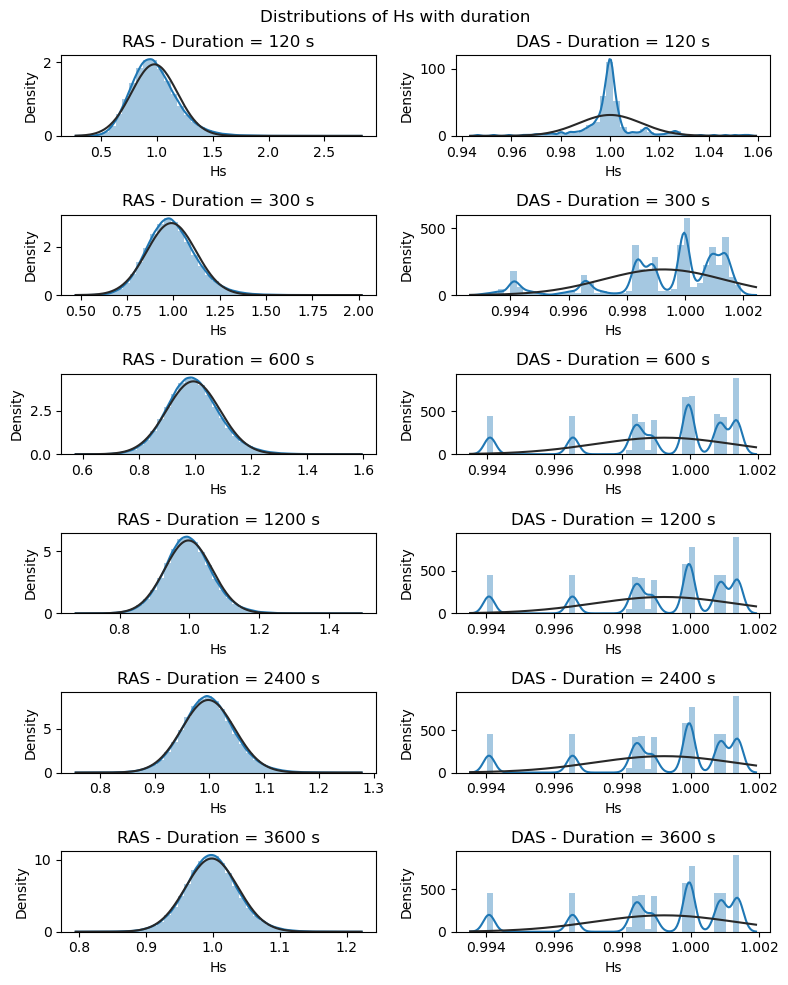

In [20]:
fig,axs = plt.subplots(len(ds_stacked.duration),2,figsize=(8,10))#,sharex=True)
for i,d in enumerate(ds_stacked.duration):
    for j,m in enumerate(ds_stacked.mthd):
        m = m.values
        data = ds_stacked.Hs.sel(duration=d,mthd=m)
        sns.distplot(data,ax = axs[i,j],fit=norm,hist=True,bins=40)
        axs[i,j].set_title(f'{m} - Duration = {int(d)} s')

fig.suptitle('Distributions of Hs with duration')
fig.tight_layout()

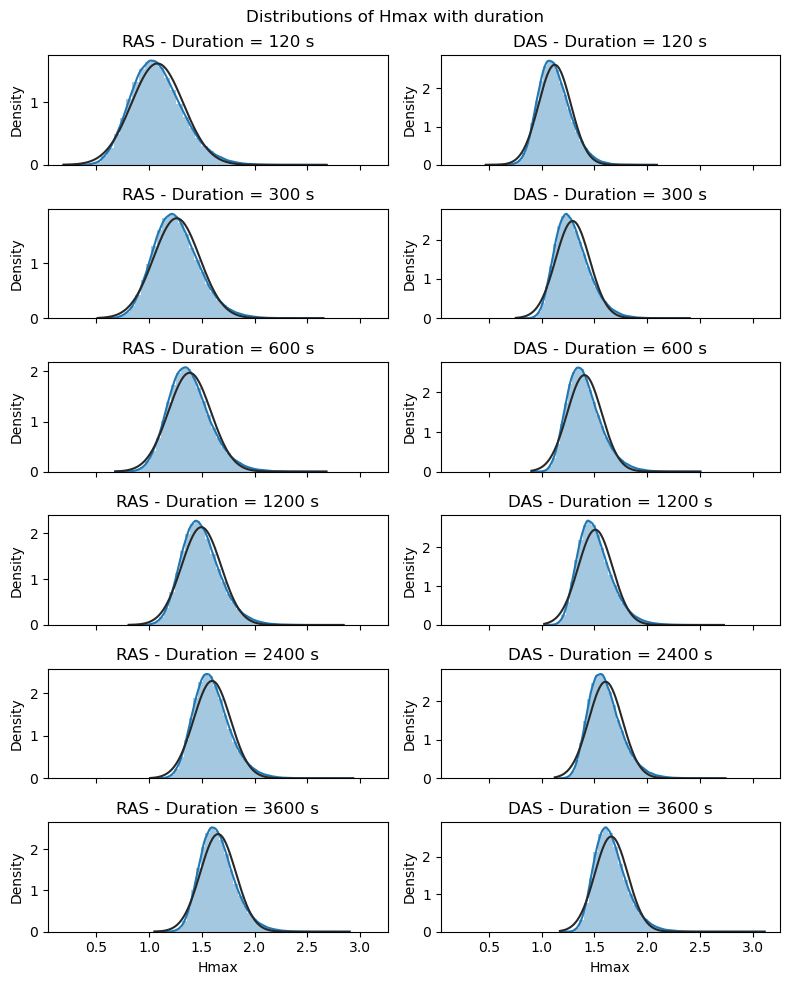

In [21]:
fig,axs = plt.subplots(len(ds_stacked.duration),2,figsize=(8,10),sharex=True)
for i,d in enumerate(ds_stacked.duration):
    for j,m in enumerate(ds_stacked.mthd):
        m = m.values
        data = ds_stacked.Hmax.sel(duration=d,mthd=m)
        sns.distplot(data,ax = axs[i,j],fit=norm,hist=True,bins=40)
        axs[i,j].set_title(f'{m} - Duration = {int(d)} s')

fig.suptitle('Distributions of Hmax with duration')
fig.tight_layout()

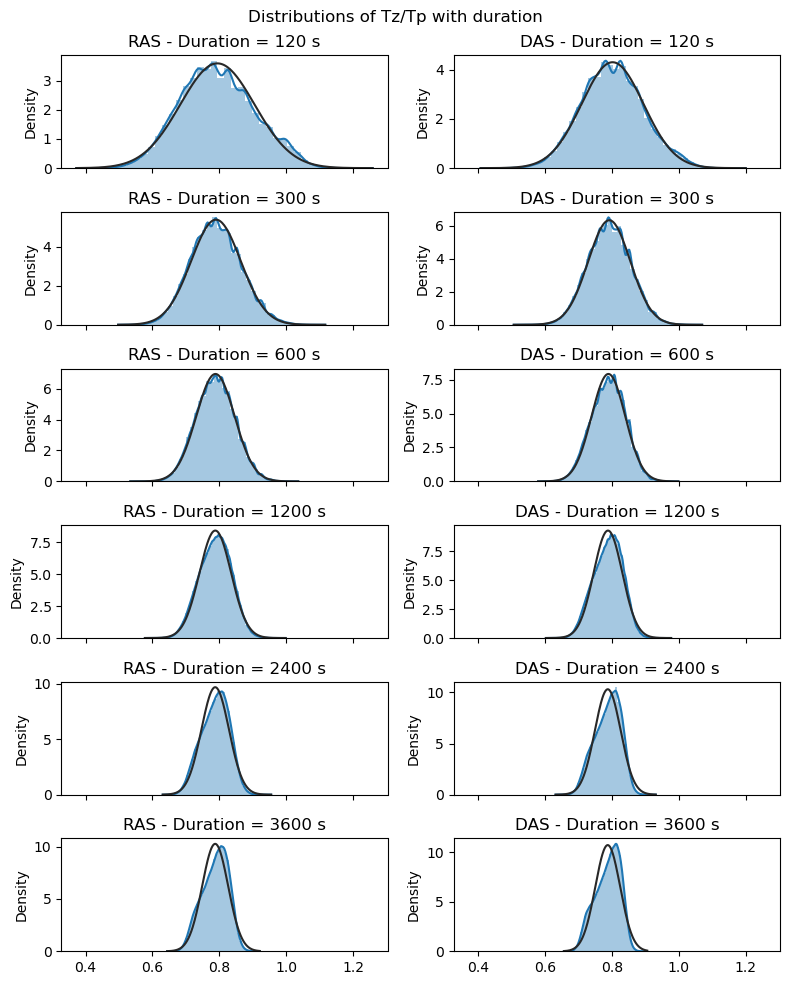

In [22]:
fig,axs = plt.subplots(len(ds_stacked.duration),2,figsize=(8,10),sharex=True)
for i,d in enumerate(ds_stacked.duration):
    for j,m in enumerate(ds_stacked.mthd):
        m = m.values
        data = ds_stacked.Tz.sel(duration=d,mthd=m)/ds_stacked.tp
        sns.distplot(data,ax = axs[i,j],fit=norm,hist=True,bins=40)
        axs[i,j].set_title(f'{m} - Duration = {int(d)} s')

fig.suptitle('Distributions of Tz/Tp with duration')
fig.tight_layout()

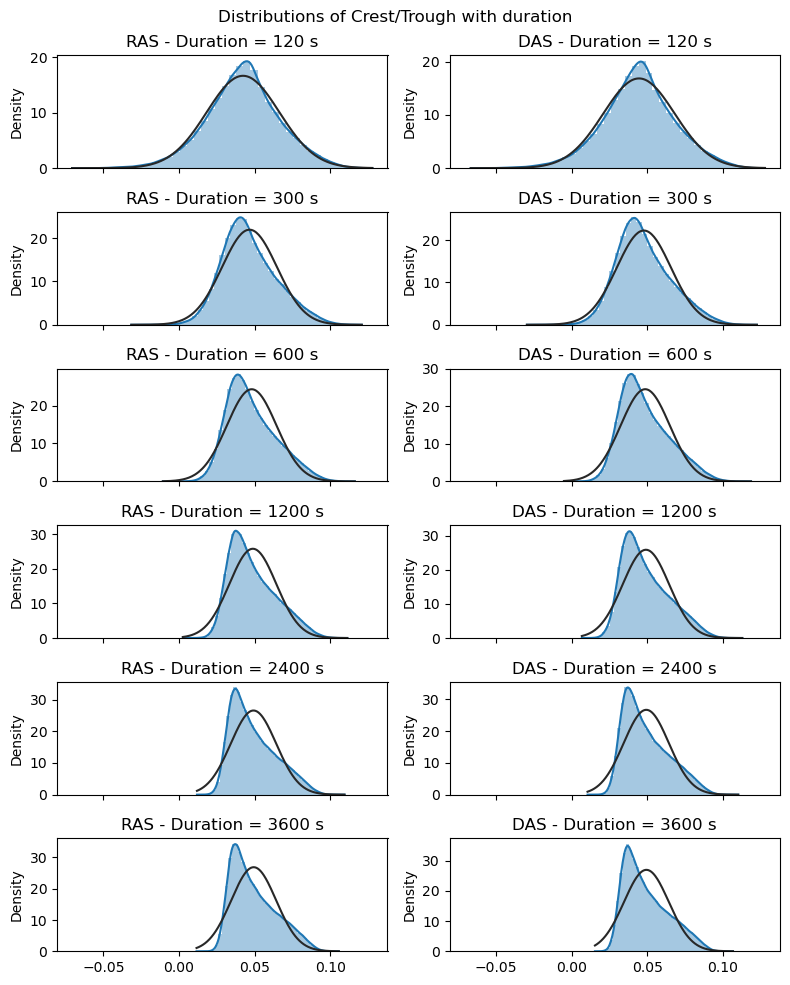

In [23]:
fig,axs = plt.subplots(len(ds_stacked.duration),2,figsize=(8,10),sharex=True)
for i,d in enumerate(ds_stacked.duration):
    for j,m in enumerate(ds_stacked.mthd):
        m = m.values
        data = ds_stacked.r.sel(duration=d,mthd=m)/ds_stacked.tp
        sns.distplot(data,ax = axs[i,j],fit=norm,hist=True,bins=40)
        axs[i,j].set_title(f'{m} - Duration = {int(d)} s')
fig.suptitle('Distributions of Crest/Trough with duration')
fig.tight_layout()

In [25]:
ds_results_mean = ds.stack(sample=['tp','gamma','seed']).mean(dim='sample')
ds_results_std = ds.stack(sample=['tp','gamma','seed']).std(dim='sample')
ds_results = ds_results_std/ds_results_mean
ds_results = ds_results.drop('this_seed')
ds_results

<xarray.Dataset>
Dimensions:   (duration: 6, mthd: 2)
Coordinates:
  * duration  (duration) int32 120 300 600 1200 2400 3600
  * mthd      (mthd) <U3 'RAS' 'DAS'
Data variables:
    H13       (mthd, duration) float64 0.2214 0.1433 0.1019 ... 0.01208 0.01026
    Hmax      (mthd, duration) float64 0.2279 0.1736 0.1458 ... 0.0992 0.09456
    Hs        (mthd, duration) float64 0.2095 0.1346 0.09576 ... 0.00207 0.00207
    Tz        (mthd, duration) float64 0.2993 0.2743 0.2659 ... 0.259 0.2585
    r         (mthd, duration) float64 0.5019 0.2615 0.1848 ... 0.1071 0.09702
    HmHs      (mthd, duration) float64 0.13 0.1192 0.1124 ... 0.09919 0.09456

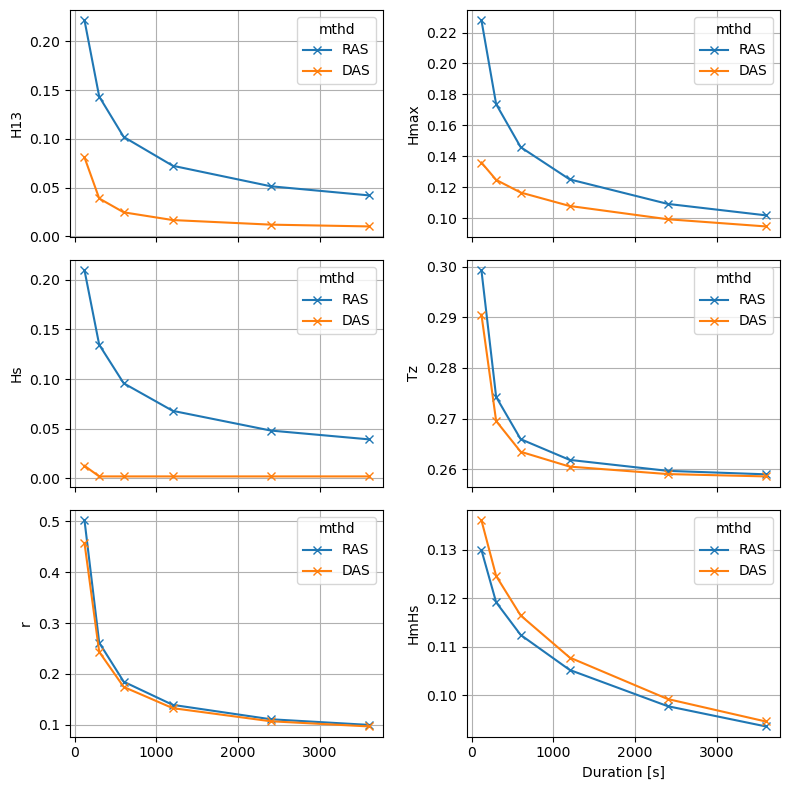

In [26]:
fig,axs = plt.subplots(3,2,sharex=True,figsize=(8,8))
axs = axs.ravel()

for i,v in enumerate(ds_results.data_vars):
    ax=axs[i]
    ds_results[v].plot(hue='mthd',ax=ax,marker='x')
    # ax.set_ylim((0,0.05))
    ax.grid('on')
    ax.set_xlabel('')

ax.set_xlabel('Duration [s]')
fig.tight_layout()

fig.savefig('Normalised_Duration.png')
# for ax in axs:
#     ax.set_ylim(bottom=0)